# Algorytmy zachlanne dla zagadnienia komiwojazera

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict

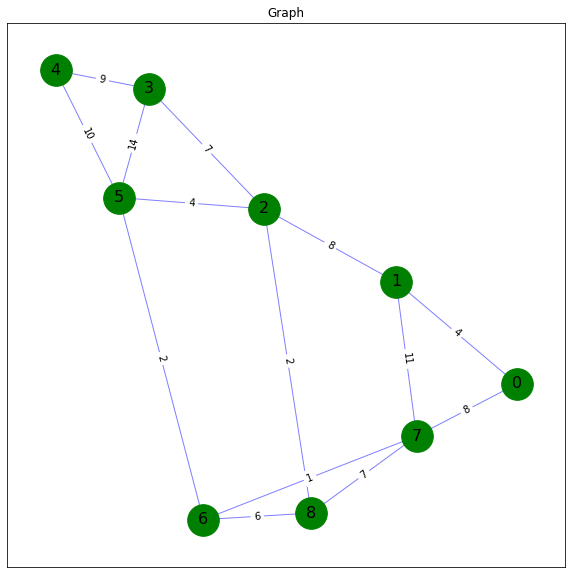

In [13]:
weights = [
    (0, 1, 4),
    (0, 7, 8),
    (1, 7, 11),
    (2, 1, 8),
    (2, 8, 2),
    (2, 5, 4),
    (2, 3, 7),
    (3, 4, 9),
    (3, 5, 14),
    (4, 5, 10),
    (5, 6, 2),
    (6, 8, 6),
    (6, 7, 1),
    (7, 8, 7),
]

G = nx.Graph()
M = nx.to_numpy_array(G)
G = nx.Graph(M)

G.add_weighted_edges_from(weights)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(9)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Graph")
plt.show()

In [16]:
M = nx.to_numpy_array(G)

def nearestNeighbour(G: List[List[int]], start: int) -> List[int]:
    current = start
    visited = []
    n = len(G)

    while len(visited) < n:
        visited.append(current)
        minimal = np.inf
        for i in range(n):
            if minimal > G[current][i] and G[current][i] > 0 and i not in visited:
                minimal = i

        if minimal == np.inf:
            return visited
        current = minimal

    return visited

print(nearestNeighbour(M, 0))
M


[0, 1, 2, 8, 5, 3, 4]


array([[ 0.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.],
       [ 8., 11.,  0.,  0.,  7.,  0.,  0.,  0.,  1.],
       [ 0.,  8.,  0.,  0.,  2.,  4.,  7.,  0.,  0.],
       [ 0.,  0.,  7.,  2.,  0.,  0.,  0.,  0.,  6.],
       [ 0.,  0.,  0.,  4.,  0.,  0., 14., 10.,  2.],
       [ 0.,  0.,  0.,  7.,  0., 14.,  0.,  9.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  6.,  2.,  0.,  0.,  0.]])

# Greedy G-TSP

In [49]:
def notCycle(path, newEdge):
    newPath = path + [newEdge]
    end = newEdge[1]
    start = newEdge[0]

    for el in path:
        if el[0] == start or el[1] == end:
            return False
        if el[0] == end:
            for elem in path:
                if start == elem[1]:
                    return False
        
        if el[1] == start:
            for elem in path:
                if end == elem[0]:
                    return False

    return True

# (3, 4), (2, 8)

# (4, 3)

def addEdgeToPath(path, newEdge):
    # path += [newEdge]
    position = 0
    start, end, weight = newEdge
    for i, el in enumerate(path):
        if el[0] == end:
            position = i
            break

        if el[1] == start:
            position = i + 1
            break
    path.insert(position, newEdge)


def greedyTSP(G):
    edges = []
    n = len(G)
    for i in range(n):
        for j in range(n):
            if G[i][j] > 0:
                edges.append((i, j, G[i][j]))
    edges.sort(key=lambda x: x[2])
    path = []
    print(edges)
    while len(path) < n - 1 and len(edges) > 0:
        newEdge = edges.pop(0)
        if notCycle(path, newEdge):
            addEdgeToPath(path, newEdge)
    
    return path
    

greedyTSP(M)


[(2, 8, 1.0), (8, 2, 1.0), (3, 4, 2.0), (4, 3, 2.0), (5, 8, 2.0), (8, 5, 2.0), (0, 1, 4.0), (1, 0, 4.0), (3, 5, 4.0), (5, 3, 4.0), (4, 8, 6.0), (8, 4, 6.0), (2, 4, 7.0), (3, 6, 7.0), (4, 2, 7.0), (6, 3, 7.0), (0, 2, 8.0), (1, 3, 8.0), (2, 0, 8.0), (3, 1, 8.0), (6, 7, 9.0), (7, 6, 9.0), (5, 7, 10.0), (7, 5, 10.0), (1, 2, 11.0), (2, 1, 11.0), (5, 6, 14.0), (6, 5, 14.0)]


[(0, 1, 4.0), (7, 6, 9.0), (6, 3, 7.0), (3, 4, 2.0), (2, 8, 1.0), (8, 5, 2.0)]